In [ ]:
from analysis import *

In [68]:
freqs = giveLogSpaceFarray(20,2000, 50)

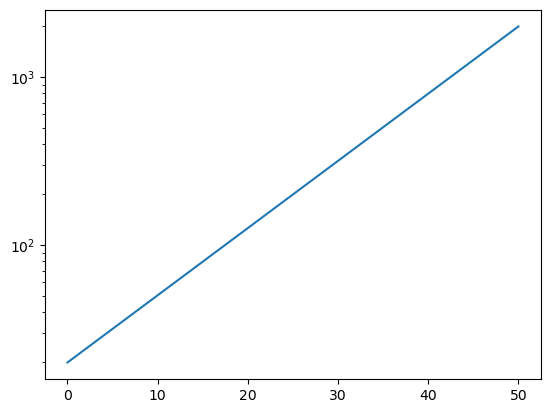

In [70]:
plt.plot(freqs)
plt.yscale('log')

In [ ]:
# Define the function to generate the commands
def generate_commands(frequencies, amplitude):
    commands = []
    commands.append('(Connect "33621A", "USB0::0x0957::0x5407::MY53700452::0::INSTR", "33500B/33600A Series Function / Arbitrary Waveform Generators / 2.09")')
    
    total_time = 60000 #ms
    pause_time = 100
    sweep_time = total_time / len(frequencies) - pause_time

    for f in frequencies:
        resting_frequency = 1
        frequency = round(f,2)
        voltage = amplitude / 1000
        
        # Main command
        commands.append(f":SOURce:APPLy:SINusoid {frequency},{voltage:.4f}")
        commands.append(f"(Wait {int(sweep_time)}ms)")
        
        # Intermediate command with 0.001 V
        commands.append(f":SOURce:APPLy:SINusoid {resting_frequency},0.001")
        commands.append(f"(Wait {pause_time}ms)")
    
    return "\n".join(commands)

# Generate the commands
commands = generate_commands(freqs, 750)

# Save the commands to a text file
output_file_path = 'sine_sweep_750.txt'
with open(output_file_path, 'w') as file:
    file.write(commands)

output_file_path


'sine_sweep_max.txt'